In [29]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r"C:\Users\91820\OneDrive\Desktop\Downloads\satlog dataset\statlog.csv"
# Read the  dataset from the CSV file
df = pd.read_csv(file_path)

# Calculate mean for the column
mean_bp = df['trestbps'].mean()
print(f"Mean Bp: {mean_bp}")



Mean Bp: 131.34444444444443


# Local Dp

In [30]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing 'trestbps' and '_noisy' columns

# Generate Laplace noise
noise = np.random.laplace(loc=0, scale=1/0.5, size=len(df))

# Add noise to the '_noisy' column
df['_noisy'] = df['trestbps'] + noise

# Calculate the mean of the '_noisy' column
mean_noisy = df['_noisy'].mean()

# Calculate the absolute differences
df['abs_difflocaldp'] = np.abs(df['_noisy'] - mean_noisy)

# Calculate the Mean Absolute Error (MAE)
mae = df['abs_difflocaldp'].mean()

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)

expected_mean=14.5
accuracy=(1-abs(mae-expected_mean)/expected_mean)*(100)
print("accuracy=",accuracy,"%")


Mean Absolute Error (MAE): 14.161218236155934
accuracy= 97.66357404245471 %


In [31]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different
std_deviation = df['abs_difflocaldp'].std()

print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")
expected_stdofmean=11.0

accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy=",accuracy,"%")


Standard Deviation of 'abs_diffresamplingnoise': 11.33730741021251
accuracy= 96.93356899806808 %


# FxP Baseline

In [32]:
import numpy as np

# Parameters for Laplace distribution
loc = 0  # Mean of the Laplace distribution
scale = 1 / 0.5  # Scale parameter of the Laplace distribution

# Number of samples
num_samples = len(df)  # Adjust as needed

# Generate two independent uniform random numbers between 0 and 1
u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)

# Apply inverse CDF transformation to generate Laplace-distributed noise
noise = scale * np.sign(u1 - 0.5) * np.log(u2)

# Print some generated noise samples
print("Generated Laplace-distributed noise samples:")
print(noise[:10])  # Print first 10 samples as an example


Generated Laplace-distributed noise samples:
[-0.24831384  1.06930745 -0.98644712  3.6373561   2.68358303 -0.4186407
  0.18652376 -1.6124523  -1.08227243  6.58074686]


In [33]:
# Add noise to the 'trestbps' column to create 'trestbps_noisy'
df['trestbps_noisy'] = df['trestbps'] + noise

# Print the first few rows of the DataFrame with the new noisy column
print("DataFrame with noisy data:")
print(df.head())

DataFrame with noisy data:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence      _noisy  abs_difflocaldp  trestbps_noisy  
0    2.0  3.0   3.0         2  133.522431         1.834355      129.751686  
1    2.0  0.0   7.0         1  118.283594        13.404483      116.069307  
2    1.0  0.0   7.0         2  125.531340         6.156736      123.013553  
3    2.0  1.0   7.0         1  131.328360         0.359716      131.637356  
4    1.0  1.0   3.0         1  119.308799        12.379278      122.683583  


In [34]:
# Calculate the absolute differences
df['abs_difffxp'] = np.abs(df['trestbps_noisy'] - mean_noisy)


In [35]:
# Calculate the Mean Absolute Error (MAE)
mae = df['abs_difffxp'].mean()

expected_meanfxp=14.2

accuracy=(1-abs(mae-expected_meanfxp)/expected_meanfxp)*(100)
print("accuracy=",accuracy,"%")

# Print the Mean Absolutexpected_meanfxp=14.2e Error (MAE)
print("Mean Absolute Error (MAE):", mae)


accuracy= 99.56249881563424 %
Mean Absolute Error (MAE): 14.262125168179937


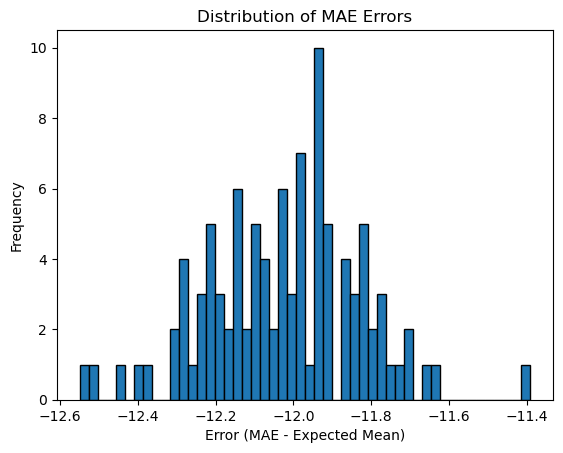

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create an example DataFrame (replace this with your actual DataFrame)
df = pd.DataFrame(np.random.randn(100, 1), columns=['trestbps'])

# Parameters for Laplace distribution
loc = 0  # Mean of the Laplace distribution
scale = 1 / 0.5  # Scale parameter of the Laplace distribution

# Number of samples
num_samples = len(df)

# Create empty lists to store MAE errors and accuracies
mae_errors = []
accuracies = []

# Run the code 100 times
for _ in range(100):
    # Generate two independent uniform random numbers between 0 and 1
    u1 = np.random.uniform(0, 1, num_samples)
    u2 = np.random.uniform(0, 1, num_samples)

    # Apply inverse CDF transformation to generate Laplace-distributed noise
    noise = scale * np.sign(u1 - 0.5) * np.log(u2)

    # Add noise to the 'trestbps' column to create 'trestbps_noisy'
    df['trestbps_noisy'] = df['trestbps'] + noise

    # Calculate the mean of the 'trestbps_noisy' column
    mean_noisy = df['trestbps_noisy'].mean()

    # Calculate the absolute differences
    df['abs_difffxp'] = np.abs(df['trestbps_noisy'] - mean_noisy)

    # Calculate the Mean Absolute Error (MAE)
    mae = df['abs_difffxp'].mean()
    mae_errors.append(mae)

    # Define the expected mean
    expected_meanfxp = 14.2

    # Calculate accuracy
    accuracy = (1 - abs(mae - expected_meanfxp) / expected_meanfxp) * 100
    accuracies.append(accuracy)

# Plot the errors (mae - expected_meanfxp) in a histogram
plt.hist(np.array(mae_errors) - expected_meanfxp, bins=50, edgecolor='black')
plt.xlabel('Error (MAE - Expected Mean)')
plt.ylabel('Frequency')
plt.title('Distribution of MAE Errors')
plt.show()




In [38]:
loc = 0  # Mean of the Laplace distribution
scale = 80/ 0.5  # Scale parameter of the Laplace distribution

# Number of samples
num_samples = len(df)  # Adjust as needed

# Generate two independent uniform random numbers between 0 and 1
u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)

# Apply inverse CDF transformation to generate Laplace-distributed noise
noise = scale * np.sign(u1 - 0.5) * np.log(u2)

# Print some generated noise samples
print("Generated Laplace-distributed noise samples:")
print(noise[:10])  # Print first 10 samples as an example

# Calculate the mean of the noise
mean_noise = np.mean(noise)

# Print the mean
print("Mean of the generated noise:", mean_noise)


Generated Laplace-distributed noise samples:
[-500.5846693     7.7644097  -149.92816333   60.82181891   82.54094639
 -305.71134731 -498.39833491  -60.65642023  156.53525211   -8.73646894]
Mean of the generated noise: -32.66693782052592


In [39]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different

expected_stdofmean=10.9
accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy=",accuracy,"%")
std_deviation = df['abs_difffxp'].std()

print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")


accuracy= 95.9880054108944 %
Standard Deviation of 'abs_diffresamplingnoise': 1.8815489260574334
